In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("twitter_training/twitter_training.csv",header= None)

In [3]:
df.columns = ["id", "entity", "sentiment", "tweet"]

In [4]:
print(df.columns)

Index(['id', 'entity', 'sentiment', 'tweet'], dtype='object')


In [5]:
text_column = "tweet"

In [6]:
df = df.dropna(subset=[text_column])

In [7]:
print(df.shape)

(73996, 4)


In [8]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [9]:
df = df[['tweet', 'sentiment']].copy()


In [10]:
df["Sentiment"] = df[text_column].apply(get_sentiment)

In [11]:
print("\nSentiment Counts:")
print(df["Sentiment"].value_counts())


Sentiment Counts:
Sentiment
Positive    34074
Negative    21358
Neutral     18564
Name: count, dtype: int64


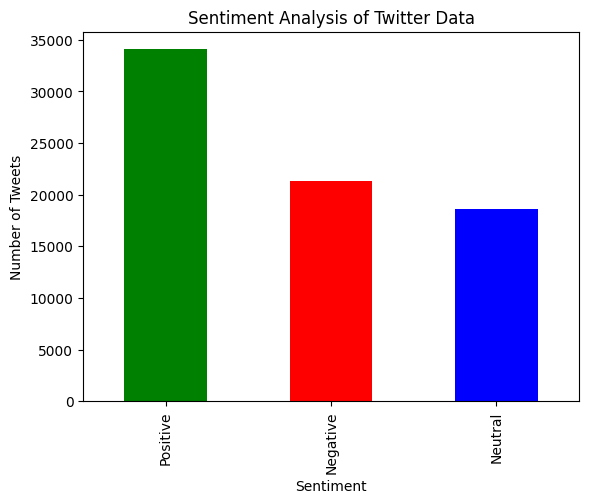

In [12]:
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Analysis of Twitter Data")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()